## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  79.198983   808.910910  0.502819  1.468328  1.404241
1  15.144183   361.528583  0.287632  6.793488  1.414588
2  12.166757   816.693511  0.536590  9.156481  1.651760
3  58.257728   599.933930  0.691579  3.897308  1.408201
4  49.927986  1530.141628  0.380936  1.437021  1.475917


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8484530	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.8408908	total: 70.1ms	remaining: 35s
2:	learn: 0.8333101	total: 70.6ms	remaining: 23.5s
3:	learn: 0.8247447	total: 71.1ms	remaining: 17.7s
4:	learn: 0.8171547	total: 71.7ms	remaining: 14.3s
5:	learn: 0.8114192	total: 72.3ms	remaining: 12s
6:	learn: 0.8032721	total: 72.8ms	remaining: 10.3s
7:	learn: 0.7944077	total: 73.2ms	remaining: 9.07s
8:	learn: 0.7877975	total: 73.7ms	remaining: 8.12s
9:	learn: 0.7823833	total: 74.2ms	remaining: 7.34s
10:	learn: 0.7755350	total: 74.7ms	remaining: 6.72s
11:	learn: 0.7684244	total: 75.2ms	remaining: 6.19s
12:	learn: 0.7610710	total: 75.7ms	remaining: 5.75s
13:	learn: 0.7543747	total: 76.3ms	remaining: 5.37s
14:	learn: 0.7484388	total: 76.8ms	remaining: 5.04s
15:	learn: 0.7424623	total: 77.3ms	remaining: 4.76s
16:	learn: 0.7348323	total: 77.8ms	remaining: 4.5s
17:	learn: 0.7285027	total: 78.2ms	remaining: 4.27s
18:	learn: 0.7230407	total: 78.7ms	remaining: 4.0

111:	learn: 0.3675965	total: 118ms	remaining: 934ms
112:	learn: 0.3652855	total: 118ms	remaining: 929ms
113:	learn: 0.3631593	total: 119ms	remaining: 922ms
114:	learn: 0.3609555	total: 119ms	remaining: 916ms
115:	learn: 0.3585987	total: 120ms	remaining: 911ms
116:	learn: 0.3568227	total: 120ms	remaining: 905ms
117:	learn: 0.3548880	total: 120ms	remaining: 900ms
118:	learn: 0.3524545	total: 121ms	remaining: 895ms
119:	learn: 0.3501977	total: 121ms	remaining: 890ms
120:	learn: 0.3480568	total: 122ms	remaining: 886ms
121:	learn: 0.3457859	total: 122ms	remaining: 881ms
122:	learn: 0.3440639	total: 123ms	remaining: 876ms
123:	learn: 0.3421067	total: 123ms	remaining: 871ms
124:	learn: 0.3396746	total: 124ms	remaining: 866ms
125:	learn: 0.3373156	total: 124ms	remaining: 862ms
126:	learn: 0.3348170	total: 125ms	remaining: 856ms
127:	learn: 0.3330867	total: 125ms	remaining: 851ms
128:	learn: 0.3310410	total: 125ms	remaining: 847ms
129:	learn: 0.3289849	total: 126ms	remaining: 843ms
130:	learn: 

271:	learn: 0.1736250	total: 186ms	remaining: 498ms
272:	learn: 0.1731497	total: 187ms	remaining: 497ms
273:	learn: 0.1725213	total: 187ms	remaining: 496ms
274:	learn: 0.1718781	total: 187ms	remaining: 494ms
275:	learn: 0.1712785	total: 188ms	remaining: 493ms
276:	learn: 0.1708391	total: 189ms	remaining: 492ms
277:	learn: 0.1698901	total: 189ms	remaining: 490ms
278:	learn: 0.1691253	total: 189ms	remaining: 489ms
279:	learn: 0.1685649	total: 190ms	remaining: 488ms
280:	learn: 0.1681146	total: 190ms	remaining: 487ms
281:	learn: 0.1671348	total: 191ms	remaining: 485ms
282:	learn: 0.1667906	total: 191ms	remaining: 484ms
283:	learn: 0.1663034	total: 191ms	remaining: 482ms
284:	learn: 0.1656929	total: 192ms	remaining: 482ms
285:	learn: 0.1654150	total: 192ms	remaining: 480ms
286:	learn: 0.1648743	total: 193ms	remaining: 479ms
287:	learn: 0.1640296	total: 193ms	remaining: 478ms
288:	learn: 0.1631915	total: 194ms	remaining: 477ms
289:	learn: 0.1625264	total: 194ms	remaining: 476ms
290:	learn: 

529:	learn: 0.0812500	total: 299ms	remaining: 265ms
530:	learn: 0.0810132	total: 300ms	remaining: 265ms
531:	learn: 0.0807809	total: 300ms	remaining: 264ms
532:	learn: 0.0805372	total: 301ms	remaining: 263ms
533:	learn: 0.0802446	total: 301ms	remaining: 263ms
534:	learn: 0.0799742	total: 302ms	remaining: 262ms
535:	learn: 0.0797501	total: 302ms	remaining: 261ms
536:	learn: 0.0795303	total: 303ms	remaining: 261ms
537:	learn: 0.0792053	total: 303ms	remaining: 260ms
538:	learn: 0.0789432	total: 303ms	remaining: 259ms
539:	learn: 0.0787290	total: 304ms	remaining: 259ms
540:	learn: 0.0785011	total: 304ms	remaining: 258ms
541:	learn: 0.0781493	total: 304ms	remaining: 257ms
542:	learn: 0.0780345	total: 305ms	remaining: 257ms
543:	learn: 0.0777685	total: 306ms	remaining: 256ms
544:	learn: 0.0774253	total: 306ms	remaining: 255ms
545:	learn: 0.0773133	total: 306ms	remaining: 255ms
546:	learn: 0.0771839	total: 307ms	remaining: 254ms
547:	learn: 0.0768499	total: 307ms	remaining: 253ms
548:	learn: 

686:	learn: 0.0548482	total: 368ms	remaining: 168ms
687:	learn: 0.0547858	total: 368ms	remaining: 167ms
688:	learn: 0.0546055	total: 369ms	remaining: 166ms
689:	learn: 0.0545434	total: 369ms	remaining: 166ms
690:	learn: 0.0544332	total: 369ms	remaining: 165ms
691:	learn: 0.0543718	total: 370ms	remaining: 165ms
692:	learn: 0.0542645	total: 370ms	remaining: 164ms
693:	learn: 0.0541631	total: 370ms	remaining: 163ms
694:	learn: 0.0541021	total: 371ms	remaining: 163ms
695:	learn: 0.0540419	total: 371ms	remaining: 162ms
696:	learn: 0.0539199	total: 372ms	remaining: 162ms
697:	learn: 0.0538607	total: 372ms	remaining: 161ms
698:	learn: 0.0538352	total: 372ms	remaining: 160ms
699:	learn: 0.0537323	total: 373ms	remaining: 160ms
700:	learn: 0.0535801	total: 373ms	remaining: 159ms
701:	learn: 0.0535220	total: 374ms	remaining: 159ms
702:	learn: 0.0534972	total: 374ms	remaining: 158ms
703:	learn: 0.0534624	total: 374ms	remaining: 157ms
704:	learn: 0.0534050	total: 375ms	remaining: 157ms
705:	learn: 

956:	learn: 0.0329114	total: 480ms	remaining: 21.6ms
957:	learn: 0.0328089	total: 481ms	remaining: 21.1ms
958:	learn: 0.0326975	total: 481ms	remaining: 20.6ms
959:	learn: 0.0325260	total: 481ms	remaining: 20.1ms
960:	learn: 0.0324168	total: 482ms	remaining: 19.5ms
961:	learn: 0.0322493	total: 482ms	remaining: 19ms
962:	learn: 0.0321505	total: 482ms	remaining: 18.5ms
963:	learn: 0.0320437	total: 483ms	remaining: 18ms
964:	learn: 0.0318808	total: 483ms	remaining: 17.5ms
965:	learn: 0.0317216	total: 483ms	remaining: 17ms
966:	learn: 0.0316564	total: 484ms	remaining: 16.5ms
967:	learn: 0.0315920	total: 484ms	remaining: 16ms
968:	learn: 0.0314663	total: 484ms	remaining: 15.5ms
969:	learn: 0.0313712	total: 485ms	remaining: 15ms
970:	learn: 0.0312472	total: 485ms	remaining: 14.5ms
971:	learn: 0.0311537	total: 486ms	remaining: 14ms
972:	learn: 0.0310968	total: 486ms	remaining: 13.5ms
973:	learn: 0.0310345	total: 487ms	remaining: 13ms
974:	learn: 0.0309330	total: 487ms	remaining: 12.5ms
975:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


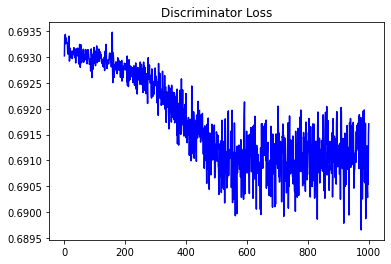

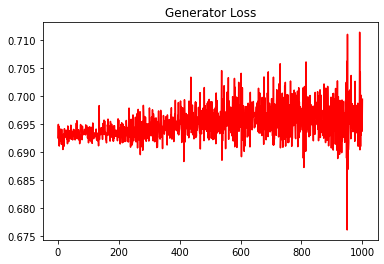

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4745289136325695


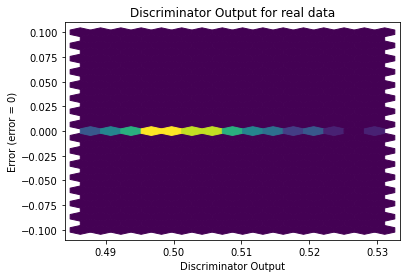

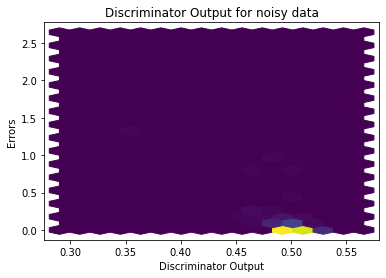

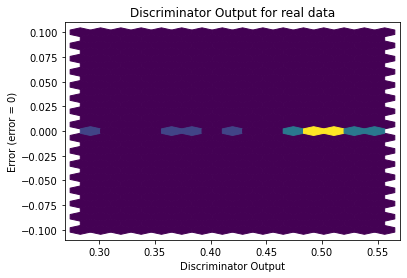

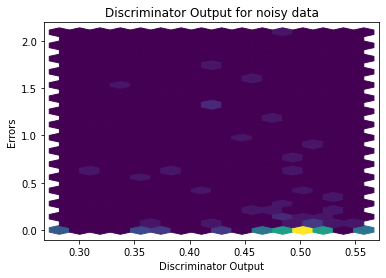

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2017]], requires_grad=True)
